<a href="https://colab.research.google.com/github/haneulllll/Deeplearning/blob/practice/Lab2_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.utils.data as data_utils
import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
import random

**GPU setting하기**

1. 상단메뉴의 런타임 - 런타임 유형 변경 - 하드웨어 가속기 메뉴에서 GPU를 선택 - 저장

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

random.seed(777)
torch.manual_seed(777)
if device == 'cuda' :
  torch.cuda.manual_seed_all(777)

cuda


**데이터 불러오기**

In [ ]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 92778696.73it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 21612077.40it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 31083496.17it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21998301.12it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



**데이터를 배치화하기(Batchfy)**

In [ ]:
batch_size = 100

train_loader = DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle=True)
test_loader = DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle=False)

torch.Size([100])
torch.Size([100, 1, 28, 28])
torch.Size([1, 28, 28])
tensor(0)


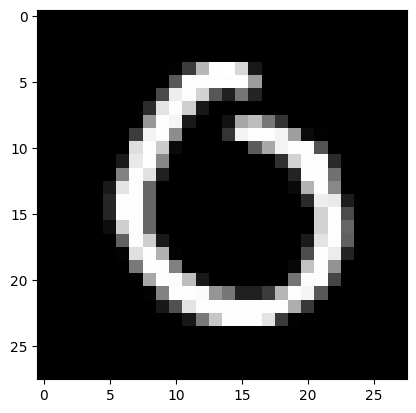

In [ ]:
for i, data in enumerate(train_loader) :
  x,y = data
  print(y.shape)
  print(x.shape)
  print(x[0].shape)
  print(y[0])
  plt.imshow(x[0][0].reshape(28,28), cmap='gray')
  break

**첫번째 Model 생성**


- Hidden layer 수 : 3개
- node 변경 : 784 - 256 - 256 - 100 - 10
- Activation Function : ReLU

In [ ]:
class MLP_model(torch.nn.Module) :
  def __init__(self, input_size, num_classes) :
    super(MLP_model, self).__init__()
    self.input_size = input_size
    self.num_classes = num_classes
    self.fc1 = torch.nn.Linear(input_size, 256)
    self.fc2 = torch.nn.Linear(256, 256)
    self.fc3 = torch.nn.Linear(256, 100)
    self.fc4 = torch.nn.Linear(100, num_classes)
    self.relu = torch.nn.ReLU()

  def forward(self, x) :
    fc1 = self.fc1(x)
    ac1 = self.relu(fc1)

    fc2 = self.fc2(ac1)
    ac2 = self.relu(fc2)

    fc3 = self.fc3(ac2)
    ac3 = self.relu(fc3)

    output = self.fc4(ac3)

    return output

In [ ]:
# 파라미터 정의

input_size = 784  #28*28
num_classes = 10
num_epochs = 5
learning_rate = 0.1

In [ ]:
# Model 정의

model = MLP_model(input_size, num_classes).to(device)  # to(device) : model을 device에서 연산하겠다.
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

**Train 과정**

In [ ]:
loss_list = []
for epoch_num in range(num_epochs) :
  average_cost = 0

  for batch_idx, (x_data, y_label) in enumerate(train_loader) :
    num_of_mini_batch = len(train_loader)
    x_data = x_data.reshape(-1, 28*28)
    input_image = x_data.to(device)
    label = y_label.to(device)
    optimizer.zero_grad()
    y_predict = model(input_image)
    loss = criterion(y_predict, label)
    loss.backward()
    optimizer.step()

    average_cost = average_cost + (loss.item()/num_of_mini_batch)
    loss_list.append(loss)

  print("Epoch {} Loss {:.5f}".format((epoch_num+1), average_cost))

Epoch 1 Loss 0.15438
Epoch 2 Loss 0.11256
Epoch 3 Loss 0.08726
Epoch 4 Loss 0.07028
Epoch 5 Loss 0.05879


**Validation 과정**

In [ ]:
with torch.no_grad() :
  num_total_data = 0
  correct = 0
  for batch_idx, (images, labels) in enumerate(test_loader) :

    images = images.reshape(-1, 28*28)
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    outputs_softmax = F.softmax(outputs, dim=1)
    predicted = torch.argmax(outputs_softmax, dim=1)

    num_total_data += len(images)
    answer = sum(labels == predicted).item()
    correct += answer

print("Model accuracy {:.5f}%".format((correct/num_total_data)*100))

Model accuracy 97.63000%


## **실습예제와 비교하여 Hidden layer의 수를 증가한 결과, Model 정확도가 향상됨을 확인.**

**두번째 Model 생성**


- Hidden layer 수 : 3개
- node 변경 : 784 - 256 - 256 - 100 - 10
- Activation Function : sigmoid

In [ ]:
class MLP_model(torch.nn.Module):
    def __init__(self, input_size, num_classes):
        super(MLP_model, self).__init__()
        self.input_size = input_size
        self.num_classes = num_classes
        self.fc1 = torch.nn.Linear(input_size, 256)
        self.fc2 = torch.nn.Linear(256, 256)
        self.fc3 = torch.nn.Linear(256, 100)
        self.fc4 = torch.nn.Linear(100, num_classes)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        fc1 = self.fc1(x)
        ac1 = self.sigmoid(fc1)

        fc2 = self.fc2(ac1)
        ac2 = self.sigmoid(fc2)

        fc3 = self.fc3(ac2)
        ac3 = self.sigmoid(fc3)

        output = self.fc4(ac3)

        return output


In [ ]:
# 파라미터 정의

input_size = 784  #28*28
num_classes = 10
num_epochs = 5
learning_rate = 0.1

In [ ]:
# Model 정의

model = MLP_model(input_size, num_classes).to(device)  # to(device) : model을 device에서 연산하겠다.
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

**Train 과정**

In [ ]:
loss_list = []
for epoch_num in range(num_epochs) :
  average_cost = 0

  for batch_idx, (x_data, y_label) in enumerate(train_loader) :
    num_of_mini_batch = len(train_loader)
    x_data = x_data.reshape(-1, 28*28)
    input_image = x_data.to(device)
    label = y_label.to(device)
    optimizer.zero_grad()
    y_predict = model(input_image)
    loss = criterion(y_predict, label)
    loss.backward()
    optimizer.step()

    average_cost = average_cost + (loss.item()/num_of_mini_batch)
    loss_list.append(loss)

  print("Epoch {} Loss {:.5f}".format((epoch_num+1), average_cost))

Epoch 1 Loss 2.30721
Epoch 2 Loss 2.30449
Epoch 3 Loss 2.30076
Epoch 4 Loss 2.29197
Epoch 5 Loss 2.03568


**Validation 과정**

In [ ]:
with torch.no_grad() :
  num_total_data = 0
  correct = 0
  for batch_idx, (images, labels) in enumerate(test_loader) :

    images = images.reshape(-1, 28*28)
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    outputs_softmax = F.softmax(outputs, dim=1)
    predicted = torch.argmax(outputs_softmax, dim=1)

    num_total_data += len(images)
    answer = sum(labels == predicted).item()
    correct += answer

print("Model accuracy {:.5f}%".format((correct/num_total_data)*100))

Model accuracy 39.67000%


## **첫번째 모델과 비교하여 활성화함수로 sigmoid를 이용한 결과, Model 정확도가 매우 감소됨을 확인.**